# Analysis of post-workshop survey data which we collect 3-6 months after a workshop

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# larger font in seaborn plots
sns.set(font_scale=2)

## Helper functions

In [3]:
# reduce annoying differences in column titles
def normalize_column_title(s):
    s = s.replace("Post-workshop survey: ", "")
    s = s.replace("Background information: ", "")
    s = s.replace("Impact of the workshop: ", "")
    return s

In [4]:
def extract_typeform_positions(file_name):
    _df = pd.read_csv(file_name)
    # in these datasets the "other" is a separate column
    # in this case fill the "non-other" column with the value from "other"
    _df["What is your current position?"].fillna(_df["Other"], inplace=True)
    return _df["What is your current position?"].to_frame()

In [5]:
def extract_indico_positions(file_name):
    _df = pd.read_csv(file_name)
    _df = _df.rename(normalize_column_title, axis='columns')
    return _df["What is your current position?"].to_frame()

## Job title/ position/ occupation

In [6]:
positions = pd.concat([
    extract_typeform_positions("data/typeform/2017.csv"),
    extract_typeform_positions("data/typeform/2018.csv"),
    extract_indico_positions("data/indico/2018.csv"),
    extract_indico_positions("data/indico/2019-a.csv"),
    extract_indico_positions("data/indico/2019-b.csv"),
    extract_indico_positions("data/indico/2019-c-2020.csv"),
])["What is your current position?"]

unique_positions = positions.unique()
counts = positions.value_counts()

values summing up to 284


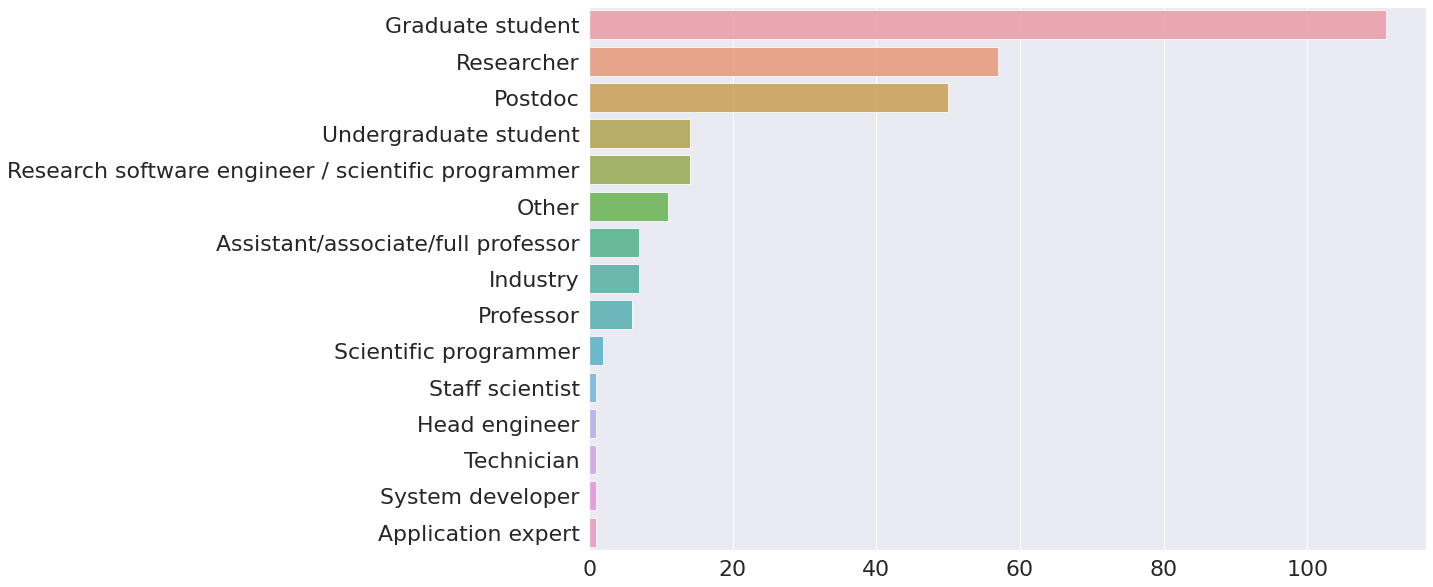

In [7]:
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(y=counts.index.str.capitalize(), x=counts.values, alpha=0.8)

f.savefig("figures/position.png", bbox_inches = 'tight')

print(f"values summing up to {sum(counts.values)}")

## Impact on code quality and collaboration

I didn't use mean() because this gave a different result since it would
ignore those rows where there is no answer.

In [11]:
df_2017 = pd.read_csv("data/typeform/2017.csv")
df_2018 = pd.read_csv("data/typeform/2018.csv")

df = pd.concat([df_2017, df_2018])


yesno = pd.DataFrame(columns = ['Question', 'Fraction'])

yesno = yesno.append({'Question': 'More reusable?',
                      'Fraction': df["Reusable"].sum()/num_answers},
                     ignore_index = True)

yesno = yesno.append({'Question': 'More reproducible?',
                      'Fraction': df["Reproducible"].sum()/num_answers},
                     ignore_index = True)

yesno = yesno.append({'Question': 'More modular?',
                      'Fraction': df["Modular"].sum()/num_answers},
                     ignore_index = True)

yesno = yesno.append({'Question': 'Better documented?',
                      'Fraction': df["Documented"].sum()/num_answers},
                     ignore_index = True)

c = [col for col in df.columns if 'easier for you to collaborate' in col]
yesno = yesno.append({'Question': 'Easier to collaborate?',
                      'Fraction': df[c[0]].sum()/num_answers},
                     ignore_index = True)

c = [col for col in df.columns if 'introduced one or more' in col]
yesno = yesno.append({'Question': 'Introduced tools to colleagues?',
                      'Fraction': df[c[0]].sum()/num_answers},
                     ignore_index = True)

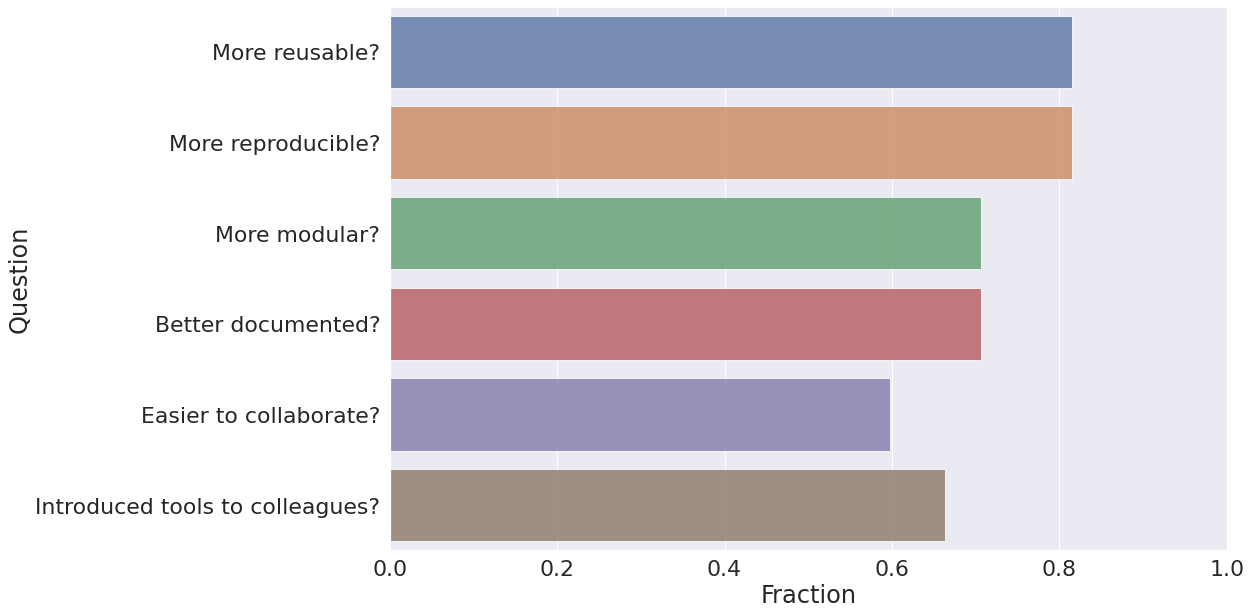

In [12]:
f, ax = plt.subplots(figsize=(15, 10))

g = sns.barplot(y=yesno.Question, x=yesno.Fraction, alpha=0.8)
g.set(xlim=(0.0, 1.0))

f.savefig("figures/yes-no-questions.png", bbox_inches = 'tight')

## Adjusting the dataset

Survey respondents misunderstood the question on "GitHub/GitLab/Bitbucket Pages" in the 2017 survey (RB: can we explain here why we think this question was misunderstood?), and it was therefore merged into the "Read the docs" question in the 2018 survey. We therefore remove the Pages question from 2017 results and rename the Read the docs question.

In [9]:
df_2017 = pd.read_csv("data/typeform/2017.csv")
df_2018 = pd.read_csv("data/typeform/2018.csv")

del df_2017["GitHub/GitLab/BitBucket Pages"]
df_2017.rename(index=str, inplace=True, columns={"Read the docs": "Read the Docs or GitHub/GitLab/BitBucket Pages"})

df = pd.concat([df_2017, df_2018])

In [10]:
num_answers = df.shape[0]
print(f"number of survey respondents: {num_answers}")

number of survey respondents: 92


## Impact on usage of software development tools

In [13]:
table = pd.DataFrame(columns = ['Tool', 'Impact', 'Count'], dtype="float")

d = {}
d["Version control"] = "Version control"
d["Automated testing"] = "Automated testing"
d["Travis CI"] = "Travis CI"
d["Code coverage analysis"] = "Coverage"
d["Jupyter Notebooks"] = "Jupyter"
d["CMake"] = "CMake"
d["Integrated development environments"] = "IDE"
d["Code review"] = "Code review"
d["Read the Docs or GitHub/GitLab/BitBucket Pages"] = "Deploying documentation"

for k, v in d.items():
    table = table.append({'Tool': v,
                          'Impact': 'Not using',
                          'Count': len(df[df[k].str.contains("don't use")])},
                          ignore_index = True)
    table = table.append({'Tool': v,
                          'Impact': 'Started using',
                          'Count': len(df[df[k].str.contains("started using")])},
                          ignore_index = True)
    table = table.append({'Tool': v,
                          'Impact': 'Using better',
                          'Count': len(df[df[k].str.contains("better than before")])},
                          ignore_index = True)
    table = table.append({'Tool': v,
                          'Impact': 'Unchanged',
                          'Count': len(df[df[k].str.contains("same way as before")])},
                          ignore_index = True)
    
result = table.pivot(index='Tool', columns='Impact', values='Count')    

# make sure tools are listed in the same order as added further up
result = result[::-1]

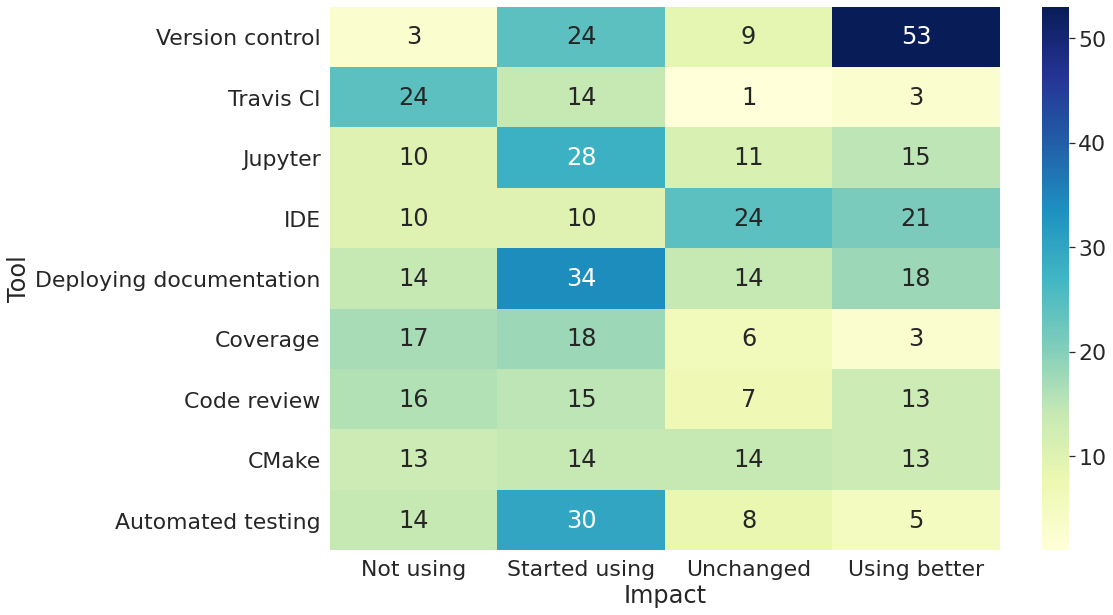

In [14]:
f, ax = plt.subplots(figsize=(15, 10))

g = sns.heatmap(result, fmt="g", cmap="YlGnBu", annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation=0) 

f.savefig("figures/heatmap.png", bbox_inches = 'tight')